In [48]:
import sys
sys.path.insert(0,"/home/gridsan/hwpang/Software/RMG-Py/")
sys.path.insert(0,"..")

import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

from rmgpy.data.thermo import ThermoData, ThermoDatabase

from tree.thermo import ThermoGroups, average_thermo_data

In [12]:
thermo_database = ThermoDatabase()

# Get number of internal node children and leaf node depths

In [36]:
empirical_tree = ThermoGroups().load("/home/gridsan/hwpang/Software/RMG-database/input/thermo/groups/radical.py", thermo_database.local_context, thermo_database.global_context)

In [37]:
sidt_tree = ThermoGroups().load("../models/split-random_run-aleatoric_prepruning-upper_bound/frac-1.0/tree.py", thermo_database.local_context, thermo_database.global_context)

In [38]:
def get_num_node_childrens(tree):
    num_node_childrens = []

    for entry in tree.entries.values():
        num_node_childrens.append(len(entry.children))

    num_node_childrens = [num for num in num_node_childrens if num!=0]
    return num_node_childrens

def get_leaf_node_depths(tree):
    leaf_node_depths = []

    for entry in tree.entries.values():
        if len(entry.children) == 0:
            parent = entry.parent
            depth = 1
            while parent != tree.top[0]:
                parent = parent.parent
                depth += 1
            leaf_node_depths.append(depth)
    
    return leaf_node_depths

empirical_num_node_childrens = get_num_node_childrens(empirical_tree)
empirical_leaf_node_depths = get_leaf_node_depths(empirical_tree)
sidt_num_node_childrens = get_num_node_childrens(sidt_tree)
sidt_leaf_node_depths = get_leaf_node_depths(sidt_tree)


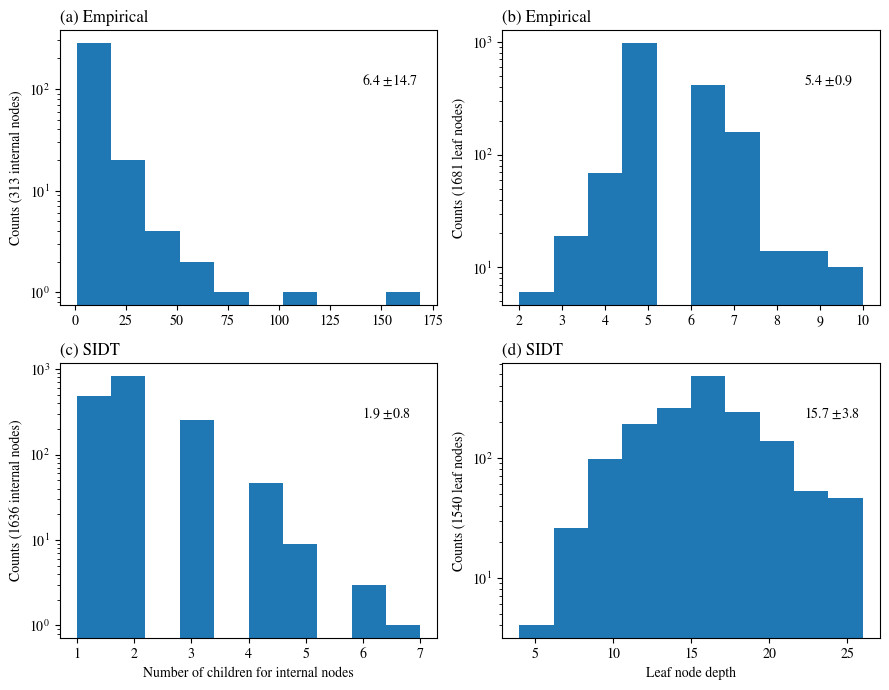

In [57]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))

ax = axs.flat[0]
ax.hist(empirical_num_node_childrens)
ax.set_yscale("log")
ax.set_ylabel(f"Counts ({len(empirical_num_node_childrens)} internal nodes)")
ax.set_title("(a) Empirical", loc="left")
ax.annotate(f"{np.mean(empirical_num_node_childrens):.1f}"+" $\pm$"+f"{np.std(empirical_num_node_childrens):.1f}", (0.8, 0.8), xycoords='axes fraction')

ax = axs.flat[1]
ax.hist(empirical_leaf_node_depths)
ax.set_yscale("log")
ax.set_ylabel(f"Counts ({len(empirical_leaf_node_depths)} leaf nodes)")
ax.set_title("(b) Empirical", loc="left")
ax.annotate(f"{np.mean(empirical_leaf_node_depths):.1f}"+" $\pm$"+f"{np.std(empirical_leaf_node_depths):.1f}", (0.8, 0.8), xycoords='axes fraction')

ax = axs.flat[2]
ax.hist(sidt_num_node_childrens)
ax.set_yscale("log")
ax.set_xlabel("Number of children for internal nodes")
ax.set_ylabel(f"Counts ({len(sidt_num_node_childrens)} internal nodes)")
ax.set_title("(c) SIDT", loc="left")
ax.annotate(f"{np.mean(sidt_num_node_childrens):.1f}"+" $\pm$"+f"{np.std(sidt_num_node_childrens):.1f}", (0.8, 0.8), xycoords='axes fraction')

ax = axs.flat[3]
ax.hist(sidt_leaf_node_depths)
ax.set_yscale("log")
ax.set_xlabel("Leaf node depth")
ax.set_ylabel(f"Counts ({len(sidt_leaf_node_depths)} leaf nodes)")
ax.set_title("(d) SIDT", loc="left")
ax.annotate(f"{np.mean(sidt_leaf_node_depths):.1f}"+" $\pm$"+f"{np.std(sidt_leaf_node_depths):.1f}", (0.8, 0.8), xycoords='axes fraction')

fig.tight_layout()